# Understanding Pandas Series and DataFrames - Lab

## Introduction

In this lab, let's get some hands-on practice working with data cleanup using Pandas. 

Import the file `'turnstile_180901.txt'`. 

In [1]:
# Import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Import the file 'turnstile_180901.txt'
df = pd.read_csv('turnstile_180901.txt')

# Print the number of rows ans columns in df
print(df.shape)

# Print the first five rows of df
df.head()

(197625, 11)


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


Rename all the columns to lowercase:

In [3]:
df.columns = [column.lower() for column in df.columns]
df.head(2)

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188


Change the index to 'linename'

In [4]:
df.set_index('linename', inplace=True)
df.head(2)

,c/a,unit,scp,station,division,date,time,desc,entries,exits
linename,,,,,,,,,,
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188


Reset the index

In [5]:
df.reset_index(inplace=True)
df.head(2)

,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits
0,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188


Create another column `'Num_Lines'` that is a count of how many lines pass through a station. Then sort your DataFrame by this column in descending order. 

*Hint: According to the [data dictionary](http://web.mta.info/developers/resources/nyct/turnstile/ts_Field_Description.txt), LINENAME represents all train lines that can be boarded at a given station. Normally lines are represented by one character. For example, LINENAME 456NQR represents trains 4, 5, 6, N, Q, and R.*

In [6]:
df['num_lines'] = df['linename'].map(lambda x: len(x))
df.head(2)

,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits,num_lines
0,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184,7
1,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188,7


Write a function to clean column names

In [7]:
def clean(col_name):
    # Clean the column name in any way you want to. Hint: think back to str methods
    cleaned = col_name.strip()
    return cleaned

In [8]:
# Use the above function to clean the column names
df.columns = [clean(col) for col in df.columns]

- Change the data type of the `'date'` column to a date
- Add a new column `'day_of_week'` that represents the day of the week

In [23]:
# Convert the data type of the 'date' column to a date
df['date'] = pd.to_datetime(df['date'])

# Add a new column 'day_of_week' that represents the day of the week 
df['day_of_week'] = df['date'].dt.dayofweek
df.head(2)

,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits,num_lines,day_of_week
0,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,00:00:00,REGULAR,6736067,2283184,7,5
1,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,04:00:00,REGULAR,6736087,2283188,7,5


C:\Users\Priscila\AppData\Local\Temp\ipykernel_7276\1277650751.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = df.groupby('day_of_week').sum()


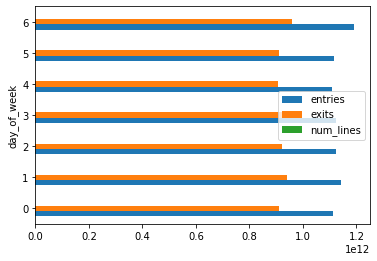

In [29]:
# Group the data by day of week and plot the sum of the numeric columns
grouped = df.groupby('day_of_week').sum()
grouped.plot(kind='barh')
plt.show();

- Remove the index of `grouped`
- Print the first five rows of `grouped`

In [33]:
# Reset the index of grouped
grouped = grouped.reset_index()

# Print the first five rows of grouped
grouped.head()

,day_of_week,entries,exits,num_lines
0,0,1114237052454,911938153513,76110
1,1,1143313287046,942230721477,77303
2,2,1123655222441,920630864687,75713
3,3,1122723988662,920691927110,76607
4,4,1110224700078,906799065337,75573


Add a new column `'is_weekend'` that maps the `'day_of_week'` column using the dictionary `weekend_map`

In [40]:
# Use this dictionary to create a new column 
weekend_map = {0:False, 1:False, 2:False, 3:False, 4:False, 5:True, 6:True}

# Add a new column 'is_weekend' that maps the 'day_of_week' column using weekend_map
grouped['is_weekend'] = grouped['day_of_week'].map(weekend_map)
grouped

,day_of_week,entries,exits,num_lines,is_weekend
0,0,1114237052454,911938153513,76110,False
1,1,1143313287046,942230721477,77303,False
2,2,1123655222441,920630864687,75713,False
3,3,1122723988662,920691927110,76607,False
4,4,1110224700078,906799065337,75573,False
5,5,1115661545514,909142081474,74725,True
6,6,1192306179082,959223750461,75306,True


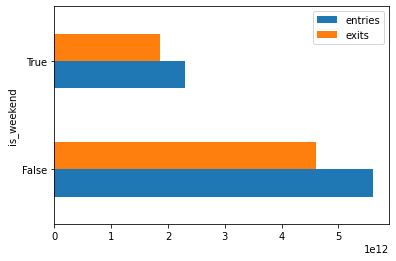

In [39]:
# Group the data by weekend/weekday and plot the sum of the numeric columns
wkend = grouped.groupby('is_weekend').sum()
wkend[['entries', 'exits']].plot(kind='barh')
plt.show()

Remove the `'c/a'` and `'scp'` columns.

In [42]:
# Remove the 'c/a' and 'scp' columns
df = df.drop(columns=['c/a', 'scp'])
df.head(2)

,linename,unit,station,division,date,time,desc,entries,exits,num_lines,day_of_week
0,NQR456W,R051,59 ST,BMT,2018-08-25,00:00:00,REGULAR,6736067,2283184,7,5
1,NQR456W,R051,59 ST,BMT,2018-08-25,04:00:00,REGULAR,6736087,2283188,7,5


## Analysis Question 

What is misleading about the day of week and weekend/weekday charts you just plotted?

In [ ]:
# The wkend data is cumulative
# There need to be more features to bring more meaningful aggregations